# Ejercicio 1 - P2


## Importo dependencias

In [1]:
#Import libraries
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

#Hago los gráficos interactivos
%matplotlib ipympl

In [2]:
#Fuente y tamaño de los caracteres en los gráficos
font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 14}
matplotlib.rc('font', **font)

## Condiciones iniciales


In [3]:
from functions import m_inf, h_inf, n_inf, s_inf

In [4]:
#Def CI
V0_1 = -77
V0_2 = -50

y0_1_vec = np.array([V0_1, m_inf(V0_1), h_inf(V0_1), n_inf(V0_1), s_inf(V0_1)])
y0_2_vec = np.array([V0_2, m_inf(V0_2), h_inf(V0_2), n_inf(V0_2), s_inf(V0_2)])

y0 = np.concatenate((y0_1_vec, y0_2_vec))

In [5]:
#Print CI

print(y0)

[-7.70000000e+01  1.18959039e-02  8.96193170e-01  1.58791231e-01
  4.20774526e-14 -5.00000000e+01  2.50812078e-01  1.53443210e-01
  5.50814314e-01  2.06115364e-09]


In [6]:
#Print dCI/dt

from derivative import derivada

t0 = 0
I_ext0 = 0
g_syn0 = 1
V_syn0 = 1

dydt0 = derivada(t0, y0, I_ext0, g_syn0, V_syn0)

print(dydt0)


[ 6.80299212e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  6.87037186e-10 -6.17401167e+01  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -6.87037186e-10]


## Solución numérica

In [7]:
from scipy.integrate import solve_ivp

t_ini = 0
t_fin = 200 #[ms]

I_ext = 10
g_syn = 1
V_syn = 0

soln = solve_ivp(derivada, [t_ini, t_fin], y0, method = "RK45", args = (I_ext,g_syn,V_syn), dense_output = True)

#Verifico que se halla resuelto el problema
if soln.success != True:
    raise ValueError(soln.message)

c:\Users\lupam\OneDrive\Escritorio\GitHub\RedesNeuronales\Practicas\practica-2\ejercicio_1\functions.py:10: RuntimeWarning: overflow encountered in exp
  a_m = 0.1*(V + 40)/(1 - np.exp(-(V + 40)/10))
c:\Users\lupam\OneDrive\Escritorio\GitHub\RedesNeuronales\Practicas\practica-2\ejercicio_1\functions.py:11: RuntimeWarning: overflow encountered in exp
  b_m = 4*np.exp(-(V + 65)/18)
c:\Users\lupam\OneDrive\Escritorio\GitHub\RedesNeuronales\Practicas\practica-2\ejercicio_1\functions.py:39: RuntimeWarning: overflow encountered in exp
  a_m = 0.1*(V + 40)/(1 - np.exp(-(V + 40)/10))
c:\Users\lupam\OneDrive\Escritorio\GitHub\RedesNeuronales\Practicas\practica-2\ejercicio_1\functions.py:40: RuntimeWarning: overflow encountered in exp
  b_m = 4*np.exp(-(V + 65)/18)
c:\Users\lupam\OneDrive\Escritorio\GitHub\RedesNeuronales\Practicas\practica-2\ejercicio_1\derivative.py:45: RuntimeWarning: divide by zero encountered in scalar divide
  dydt[1] = (m_inf(V1) - m1)/tau_m(V1)
c:\Users\lupam\OneDrive\Es

## Gráficos

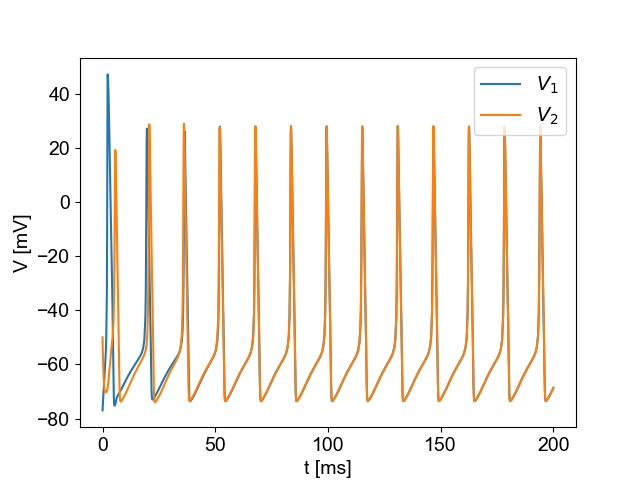

In [8]:
#V1 y V2 vs t

fig, ax = plt.subplots(1,1)

ax.plot(soln.t, soln.y[0,:], label = "$V_1$")
ax.plot(soln.t, soln.y[5,:], label = "$V_2$")
ax.set_xlabel("t [ms]")
ax.set_ylabel("V [mV]")
ax.legend()
plt.show()


In [9]:
def plot_for_g_syn(g_syn):
    '''
    Grafica V1 y V2 para g_syn
    
    '''

    #Resuelvo sistema de ecuaciones
    t_ini = 0
    t_fin = 2000 #[ms]

    I_ext = 10
    V_syn = 0

    soln = solve_ivp(derivada, [t_ini, t_fin], y0, method = "RK45", args = (I_ext,g_syn,V_syn), dense_output = True)

    #Verifico que se halla resuelto el problema
    if soln.success != True:
        raise ValueError(soln.message)

    fig, ax = plt.subplots(1,1)

    ax.plot(soln.t, soln.y[0,:], label = "$V_1$")
    ax.plot(soln.t, soln.y[5,:], label = "$V_2$")
    ax.set_xlabel("t [ms]")
    ax.set_ylabel("V [mV]")
    ax.set_ylim([-100, 50])
    ax.legend()
    plt.show()

    return

In [10]:
#Grafico para g_syn como barrera scrolleable usando widgets

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

interact(plot_for_g_syn, g_syn = widgets.FloatSlider(min = 0, max = 100, step = 0.1, value = 1))


interactive(children=(FloatSlider(value=1.0, description='g_syn'), Output()), _dom_classes=('widget-interact',…

<function __main__.plot_for_g_syn(g_syn)>

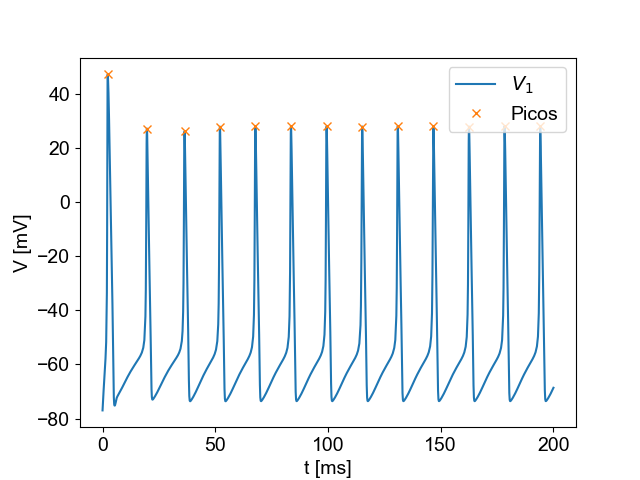

In [11]:
#Busco los picos de V1

from scipy.signal import find_peaks

V1 = soln.y[0,:]

peaks, _ = find_peaks(V1, height = 0)

fig, ax = plt.subplots(1,1)

ax.plot(soln.t, soln.y[0,:], label = "$V_1$")
ax.plot(soln.t[peaks], soln.y[0,peaks], "x", label = "Picos")
ax.set_xlabel("t [ms]")
ax.set_ylabel("V [mV]")
ax.legend()
plt.show()


In [12]:
def tasa_de_disparo(V_signal, t_fin, t_ini):
    '''
    Calcula la tasa de disparo de V
    
    '''

    peaks, _ = find_peaks(V_signal, height = 0)
    
    #Calculo la tasa de disparo
    tasa = len(peaks)/(t_fin - t_ini)
    
    return tasa

def desfasaje(t_signal, V1_signal, V2_signal):
    '''
    Calcula el desfasaje entre V1 y V2
    
    '''
    
    peaks1, _ = find_peaks(V1_signal, height = 0)
    peaks2, _ = find_peaks(V2_signal, height = 0)
    
    #Calculo el desfasaje como promedio de desfasajes
    desfasajes = np.empty(min(len(peaks1), len(peaks2)))
    for i in range(len(desfasajes)):
        desfasajes[i] = t_signal[peaks1[i]] - t_signal[peaks2[i]]
    
    return np.mean(desfasajes)

In [13]:
def any_vs_g_syn(V_syn, g_syn):

    #Resuelvo sistema de ecuaciones
    t_ini = 0
    t_fin = 200 #[ms]

    I_ext = 10

    soln = solve_ivp(derivada, [t_ini, t_fin], y0, method = "RK45", args = (I_ext,g_syn,V_syn), dense_output = True)

    #Verifico que se halla resuelto el problema
    if soln.success != True:
        raise ValueError(soln.message)

    #Calculo la tasa de disparo
    tasa_V1 = tasa_de_disparo(soln.y[0,:], t_fin, t_ini)
    tasa_V2 = tasa_de_disparo(soln.y[5,:], t_fin, t_ini)

    #Calculo el desfasaje
    desfasaje_V1_V2 = desfasaje(soln.t, soln.y[0,:], soln.y[5,:])

    return tasa_V1, tasa_V2, desfasaje_V1_V2

In [14]:

V_syn = 0

N = 100
g_syn_vec = np.linspace(0,10, num = N)

any_vs_g_syn_vec = np.empty([N, 3])

for i in range(N):
    any_vs_g_syn_vec[i] = any_vs_g_syn(V_syn, g_syn_vec[i])




c:\Users\lupam\OneDrive\Escritorio\GitHub\RedesNeuronales\Practicas\practica-2\ejercicio_1\derivative.py:42: RuntimeWarning: overflow encountered in scalar power
  dydt[0 + N_eq] = (1/C_hat) *(I_ext + I_syn(V2, s2, g_syn, V_syn) - g_K_adim*n2**4*(V2 - V_K) - g_Na_adim*m2**3*h2*(V2 - V_Na) - g_L_adim*(V2 - V_L))
c:\ProgramData\Anaconda3\envs\Maestria3\Lib\site-packages\scipy\integrate\_ivp\rk.py:109: RuntimeWarning: invalid value encountered in divide
  return norm(self._estimate_error(K, h) / scale)
c:\Users\lupam\OneDrive\Escritorio\GitHub\RedesNeuronales\Practicas\practica-2\ejercicio_1\derivative.py:42: RuntimeWarning: overflow encountered in scalar multiply
  dydt[0 + N_eq] = (1/C_hat) *(I_ext + I_syn(V2, s2, g_syn, V_syn) - g_K_adim*n2**4*(V2 - V_K) - g_Na_adim*m2**3*h2*(V2 - V_Na) - g_L_adim*(V2 - V_L))


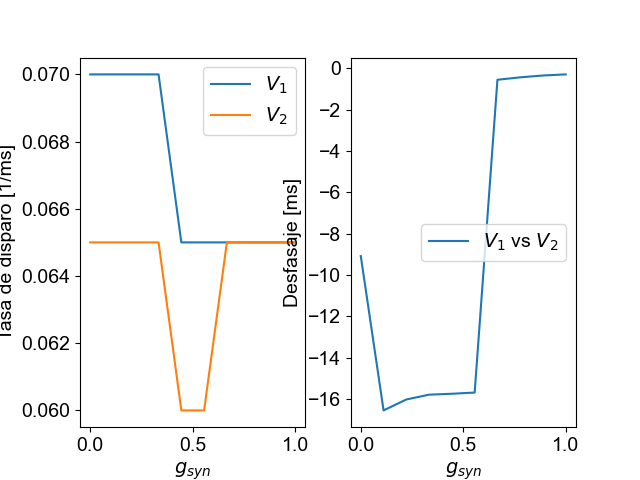

In [15]:
#Graph

fig, ax = plt.subplots(1,2)

ax[0].plot(g_syn_vec, any_vs_g_syn_vec[:,0], label = "$V_1$")
ax[0].plot(g_syn_vec, any_vs_g_syn_vec[:,1], label = "$V_2$")
ax[0].set_xlabel("$g_{syn}$")
ax[0].set_ylabel("Tasa de disparo [1/ms]")
ax[0].legend()

ax[1].plot(g_syn_vec, any_vs_g_syn_vec[:,2], label = "$V_1$ vs $V_2$")
ax[1].set_xlabel("$g_{syn}$")
ax[1].set_ylabel("Desfasaje [ms]")
ax[1].legend()

plt.show()
